<h1><center>Ecommerce Segmentation Analysis<center/><h1/>
<h2>2025<h2/>
Celine Ng


Table of Contents
1. Notebook Preparation
    1. Libraries Installation
    1. Data loading
2. Data Cleaning
    1. Duplicates
    1. Missing Values
    1. Odd data/data type
3. EDA
    1. Overview
    1. Month of Purchase
4. Segmentation
    1. RFM Analysis
    1. Who are our best customers?
    1. How can we reach them better?

# 1. Notebook Preparation

## 1.1. Libraries Installation

In [1]:
from numpy.ma.extras import column_stack
from scipy.ndimage import histogram

from utils.eda import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2. Data loading

In [2]:
data = pd.read_csv('data/data.csv')
data.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [3]:
data.shape

(1000, 28)

This dataset was obtained from
[Kaggle](https://www.kaggle.com/datasets/salahuddinahmedshuvo/ecommerce-consumer-behavior-analysis-data?resource=download),
in April 2025. This data contains 1000 rows and 28 columns including
information on purchasing patterns, demographics, product preferences,
customer satisfaction, and more.

For the purpose of this project, let's imagine this data was collected by a
small regional online shopping platform similar to *Amazon*, and our job is
 to help improve high-value customer segments and understand their
 demographics and behavior. With the goal of personalizing marketing
 strategies that increase customer engagement, loyalty, and revenue.
 Answering main questions like:
 - Who are our best customers?
- How can we reach them better?


**Initial plan**

The features can be separated into a few groups:
1. Demographics: Customer_ID, Age, Gender, Income_Level, Marital_Status,
Education_Level, Occupation, Location
2. Purchasing patterns: Purchase_Category, Purchase_Amount,
Frequency_of_Purchase, Purchase_Channel, Device_Used_for_Shopping,
Payment_Method, Time_of_Purchase, Discount_Used, Shipping_Preference
3. Other preferences: Brand_Loyalty, Return_Rate,
Customer_Loyalty_Program_Member, Purchase_Intent, Time_to_Decision
4. Marketing: Time_Spent_on_Product_Research(hours), Social_Media_Influence,
 Discount_Sensitivity, Engagement_with_Ads
5. Customer satisfaction: Product_Rating, Customer_Satisfaction


Segmentation Method to apply:
- RFM (recency, frequency, monetary value)

# 2. Data Cleaning

In [4]:
data.describe(include='all')

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
count,1000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000.000000,744,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,1000,NaN,8,2,4,3,2,969,24,989,...,NaN,3,3,5,344,2,2,4,3,NaN
top,37-611-6911,NaN,Female,High,Widowed,Bachelor's,High,Oslo,Electronics,$178.04,...,NaN,High,Desktop,PayPal,3/3/2024,True,False,Need-based,No Preference,NaN
freq,1,NaN,452,515,260,341,517,4,54,2,...,NaN,270,350,219,8,521,509,256,372,NaN
mean,NaN,34.304000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.399000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.547000
std,NaN,9.353238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.868454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.035849
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,34.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
75%,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


## 2.1. Duplicates

In [5]:
data['Customer_ID'].duplicated().any()

np.False_

## 2.2. Missing Values

In [6]:
missing_values(data)

,Missing Values,Percentage Missing,Datatype
Customer_ID,0,0.0,object
Age,0,0.0,int64
Gender,0,0.0,object
Income_Level,0,0.0,object
Marital_Status,0,0.0,object
Education_Level,0,0.0,object
Occupation,0,0.0,object
Location,0,0.0,object
Purchase_Category,0,0.0,object
Purchase_Amount,0,0.0,object


At this point there are several things worth noting down:
1. Only 2 features with missing values - Social_Media_Influence (24.7%),
Engagement_with_Ads (25.6%)
2. 8 unique values for gender, female is the most frequent answer
3. Most locations are unique - unnecessary for our use case
4. Purchase amount needs to be converted to numerical
5. Time of purchase needs to be separate into more feature

2. age ranges between 18 - 50, with median being 34
4. 2 values for income, high being the most frequent
5. 4 values for martial state, widowed is the most frequent
6. 3 education levels, bachelor's is the most frequest
7. 2 occupations
9. 24 purchase categories
11. Frequency of purchase ranges between 2-12
12. 3 purchase channels
13. Brand loyalty between 1-5, mean being 3
14. Product rating between 1-5, mean being 3
15. Time spent researching product 0-2 (hours)
16. 3 values for social media influence, high being the most frequent
17. 3 values for Discount sensitivity, very sensitive the most frequent
18. Return rate 0-2
19. Customer satisfaction 0-10, 5 is median
20. Engagement with Ads 3 values, high is frequent
21. Device used for shopping 3 values,
22. 5 ways of Payment method

In [7]:
missing_smi = data[data["Social_Media_Influence"].isna()]
missing_smi.describe(include='all')

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
count,247,247.000000,247,247,247,247,247,247,247,247,...,247.000000,180,247,247,247,247,247,247,247,247.000000
unique,247,NaN,8,2,4,3,2,246,24,245,...,NaN,3,3,5,183,2,2,4,3,NaN
top,37-611-6911,NaN,Female,Middle,Single,Master's,High,Créteil,Sports & Outdoors,$378.87,...,NaN,High,Tablet,Debit Card,8/12/2024,True,True,Wants-based,No Preference,NaN
freq,1,NaN,120,125,65,87,126,2,17,2,...,NaN,63,92,56,4,138,125,66,89,NaN
mean,NaN,34.716599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.514170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.757085
std,NaN,9.609481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.935416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.214486
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
75%,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000


In [8]:
missing_ewa = data[data["Engagement_with_Ads"].isna()]
missing_ewa.describe(include='all')

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
count,256,256.000000,256,256,256,256,256,256,256,256,...,256.000000,0,256,256,256,256,256,256,256,256.000000
unique,256,NaN,8,2,4,3,2,252,24,256,...,NaN,0,3,5,182,2,2,4,3,NaN
top,37-611-6911,NaN,Female,Middle,Widowed,Master's,High,Marseille,Home Appliances,$333.80,...,NaN,NaN,Tablet,Cash,2/9/2024,False,False,Impulsive,No Preference,NaN
freq,1,NaN,115,130,74,89,134,2,17,1,...,NaN,NaN,91,58,4,136,133,77,94,NaN
mean,NaN,34.816406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.441406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.343750
std,NaN,9.435513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.840271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.196053
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,35.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
75%,NaN,42.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [9]:
missing_smi["Customer_ID"].isin(missing_ewa["Customer_ID"]).sum()

np.int64(67)

Missing values seem to random and do not belong to a specific group of
customers.

## 2.3. Odd Data/Data Type

**Genders**

In [10]:
data["Gender"].value_counts()

Gender
Female         452
Male           449
Bigender        20
Agender         19
Genderfluid     17
Non-binary      16
Polygender      15
Genderqueer     12
Name: count, dtype: int64

In [11]:
data_data_cleaning = data.copy()
majority = ["Female", "Male"]
data_data_cleaning.Gender =\
    data_data_cleaning.Gender.apply(lambda x: x if x in majority else 'other')

Majority of customers are Female and Male. To simplify the outliers, let's
group them all under 1 category "other".

In [12]:
data_data_cleaning.Gender.value_counts()

Gender
Female    452
Male      449
other      99
Name: count, dtype: int64

**Purchase Amount**

In [13]:
data_data_cleaning['Purchase_Amount'] = \
    (data_data_cleaning['Purchase_Amount'].str.replace('$', '', regex=False))


In [14]:
data_data_cleaning['Purchase_Amount'] = pd.to_numeric(data_data_cleaning['Purchase_Amount'])
data_data_cleaning['Purchase_Amount'].dtype

dtype('float64')

**Time of Purchase**

In [15]:
data_data_cleaning.Time_of_Purchase = (pd.to_datetime(data_data_cleaning
                                                      .Time_of_Purchase))

# 3. EDA

## 3.1. Overview

1. Customer_ID: Unique identifier for each customer.
2. Age: Customer's age (integer).
3. Gender: Customer's gender (categorical: Male, Female, Non-binary, Other).
4. Income_Level: Customer's income level (categorical: Low, Middle, High).
5. Marital_Status: Customer's marital status (categorical: Single, Married,
Divorced, Widowed).
6. Education_Level: Highest level of education completed (categorical: High
School, Bachelor's, Master's, Doctorate).
7. Occupation: Customer's occupation (categorical: Various job titles).
8. Location: Customer's location (city, region, or country).
9. Purchase_Category: Category of purchased products (e.g., Electronics,
Clothing, Groceries).
10. Purchase_Amount: Amount spent during the purchase (decimal).
11. Frequency_of_Purchase: Number of purchases made per month (integer).
12. Purchase_Channel: The purchase method (categorical: Online, In-Store,
Mixed).
13. Brand_Loyalty: Loyalty to brands (1-5 scale).
14. Product_Rating: Rating given by the customer to a purchased product (1-5
scale).
15. Time_Spent_on_Product_Research: Time spent researching a product (integer,
hours or minutes).
16. Social_Media_Influence: Influence of social media on purchasing decision
(categorical: High, Medium, Low, None).
17. Discount_Sensitivity: Sensitivity to discounts (categorical: Very
Sensitive, Somewhat Sensitive, Not Sensitive).
18. Return_Rate: Percentage of products returned (decimal).
19. Customer_Satisfaction: Overall satisfaction with the purchase (1-10 scale).
20. Engagement_with_Ads: Engagement level with advertisements (categorical:
High, Medium, Low, None).
21. Device_Used_for_Shopping: Device used for shopping (categorical:
Smartphone, Desktop, Tablet).
22. Payment_Method: Method of payment used for the purchase (categorical:
Credit Card, Debit Card, PayPal, Cash, Other).
23. Time_of_Purchase: Timestamp of when the purchase was made (date/time).
24. Discount_Used: Whether the customer used a discount (Boolean: True/False).
25. Customer_Loyalty_Program_Member: Whether the customer is part of a loyalty
program (Boolean: True/False).
26. Purchase_Intent: The intent behind the purchase (categorical: Impulsive,
Planned, Need-based, Wants-based).
27. Shipping_Preference: Shipping preference (categorical: Standard, Express,
No Preference).
28. Payment_Frequency: Frequency of payment (categorical: One-time,
Subscription, Installments).
29. Time_to_Decision: Time taken from consideration to actual purchase (in
days).

Let's look at the data distribution

In [16]:
data_distribution = data_data_cleaning.copy()

feature_demographic = ['Age', 'Gender', 'Income_Level',
                       'Marital_Status', 'Education_Level', 'Occupation']
feature_purchase_pattern = ['Purchase_Category', 'Purchase_Amount',
                            'Frequency_of_Purchase', 'Purchase_Channel', 'Device_Used_for_Shopping',
                            'Payment_Method', 'Purchase_Intent',
                            'Time_to_Decision',
                            'Time_Spent_on_Product_Research(hours)', 'Shipping_Preference']
feature_marketing = ['Social_Media_Influence', 'Discount_Sensitivity',
                     'Discount_Used', 'Engagement_with_Ads', 'Customer_Loyalty_Program_Member']
feature_customer_satisfaction = ['Product_Rating', 'Customer_Satisfaction', 'Brand_Loyalty', 'Return_Rate']

num_cols = data_distribution.select_dtypes(include='number').columns

**Demographic**

In [17]:
demographic_num = []
demographic_cat = []
for col in feature_demographic:
    if col in num_cols:
        demographic_num.append(col)
    else:
        demographic_cat.append(col)
print(len(demographic_num))
print(len(demographic_cat))

1
5


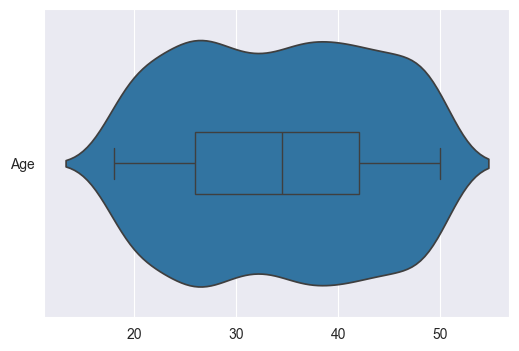

In [18]:
plt.figure(figsize = (6, 4))
violin_boxplot(data=data_distribution, columns=demographic_num)

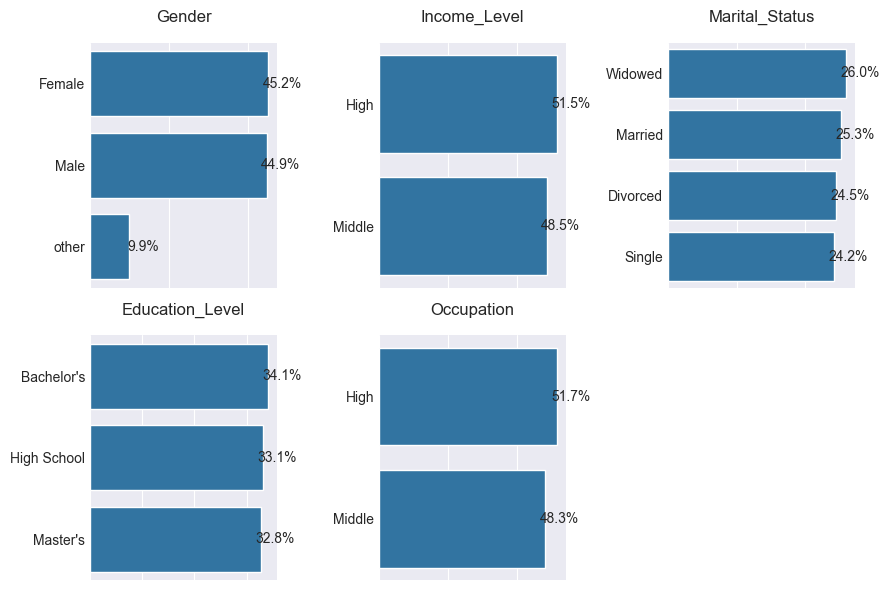

In [19]:
percentage_subplots(data=data_distribution, columns=demographic_cat, nrows=2,
                    ncols=3)

The surveyed population are on:
1. the higher end of income earners
2. the higher education degrees (considering that only 14% of US citizen
have master's completed)

**Purchase Pattern**

In [20]:
purchase_pattern_num = []
purchase_pattern_cat = []
for col in feature_purchase_pattern:
    if col in num_cols:
        purchase_pattern_num.append(col)
    else:
        purchase_pattern_cat.append(col)
print(len(purchase_pattern_num))
print(len(purchase_pattern_cat))

4
6


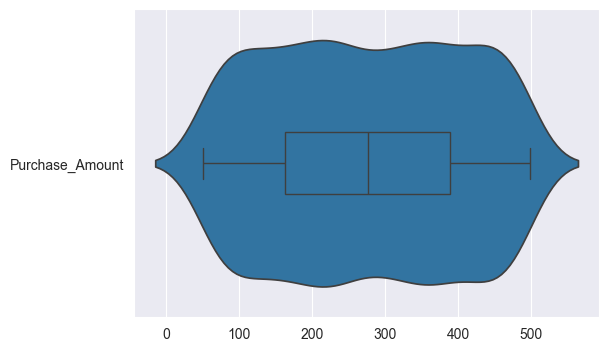

In [21]:
fig = plt.figure(figsize = (6, 4))
violin_boxplot(data=data_distribution, columns=['Purchase_Amount'])

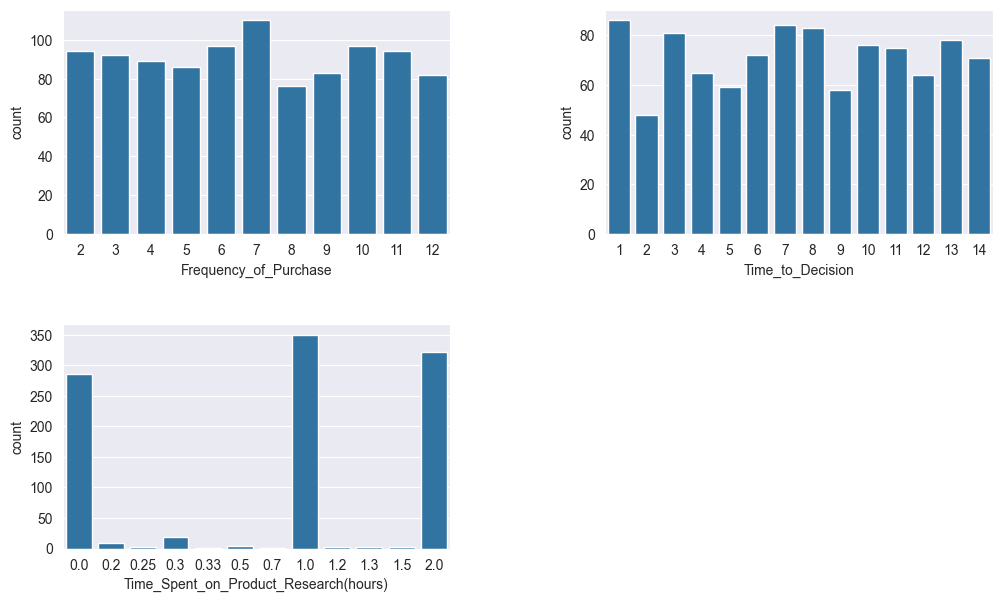

In [22]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (12, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes_flatten = axes.flatten()

for i, col in enumerate(['Frequency_of_Purchase', 'Time_to_Decision',
                         'Time_Spent_on_Product_Research(hours)']):
    sns.countplot(data=data_distribution, x=col, ax=axes_flatten[i])

axes_flatten[3].clear()
axes_flatten[3].axis('off')
plt.show()

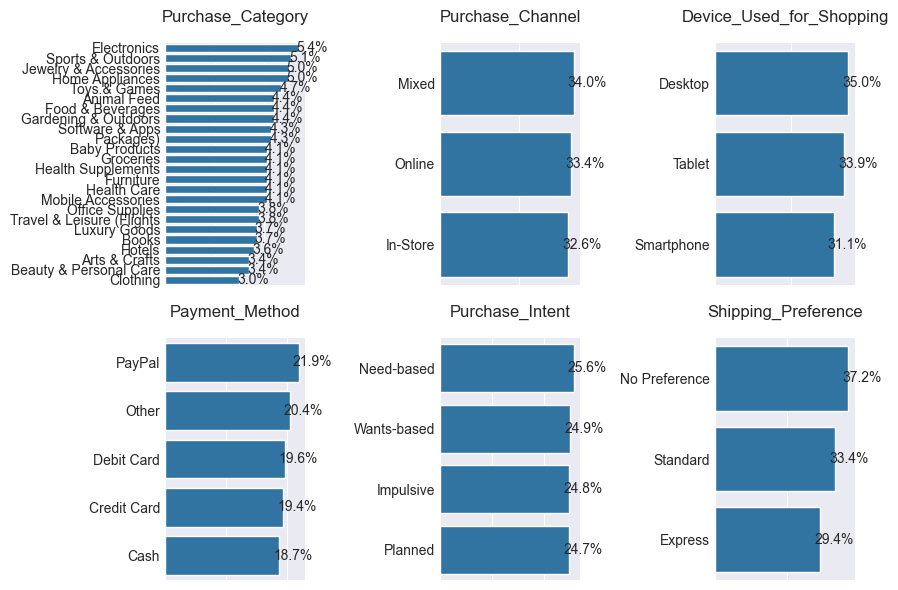

In [23]:
percentage_subplots(data=data_distribution, columns=purchase_pattern_cat, nrows=2,
                    ncols=3)

1. Both stores and online sales are equally important, so are all the
devices used for shopping
2. Only 19% cash customers, with over 60% paying with card methods.

**Marketing**

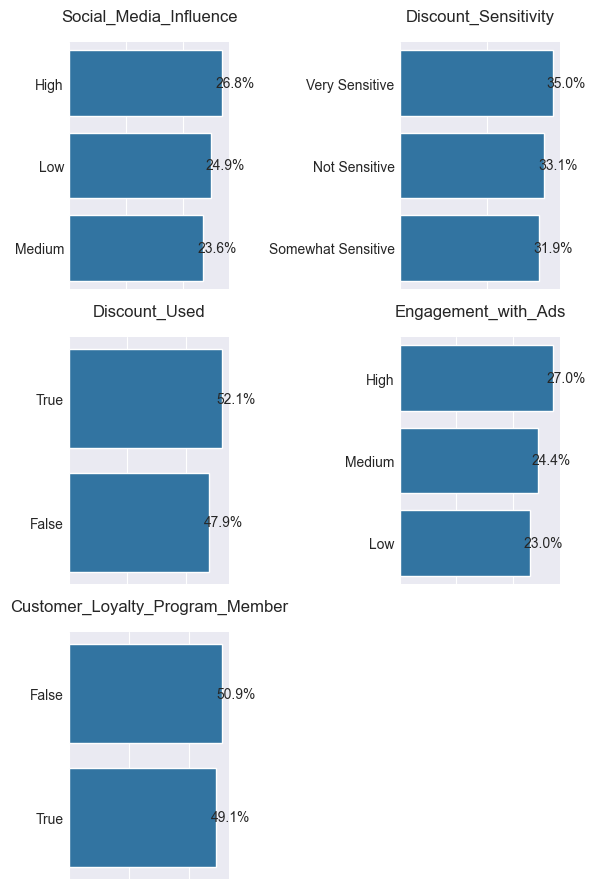

In [24]:
percentage_subplots(data=data_distribution, columns=feature_marketing, nrows=3,
                    ncols=2)

Surveyed customers are in general sensitive to  all marketing schemes
(social media, discount, and advertisement), with more than 2/3
react somewhat positively towards all strategies. Slightly under half of the customer are on the customer loyalty program

**Customer Satisfaction**

In [25]:
customer_satisfaction_num = ['Product_Rating', 'Customer_Satisfaction', 'Brand_Loyalty',]

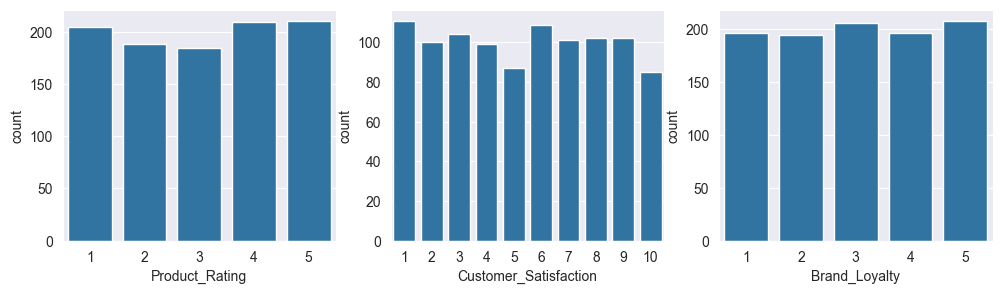

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12, 3))
axes_flatten = axes.flatten()

for i, col in enumerate(customer_satisfaction_num):
    sns.countplot(data=data_distribution, x=col, ax=axes_flatten[i])

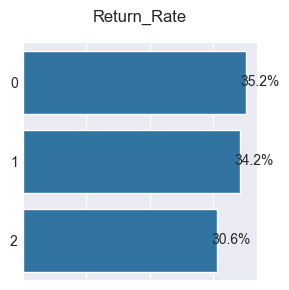

In [27]:
percentage_subplots(data=data_distribution,
                    columns=['Return_Rate'], nrows=1,
                    ncols=1)

1. Product rating, customer satisfaction, and brand loyalty are all spread
out similarly.
2. Over 60% of products gets returned

A brief overview of the data distribution shows that the population is
diverse, as most features are equally distributed over all response.

The numerical features 'Time_to_Decision', 'Time_Spent_on_Product_Research (hours)', 'Product_Rating', and 'Customer_Satisfaction' show a distribution where extreme values are more common than those in the middle. For instance, users often report spending 0, 1, or 2 hours on product research, while values like 0.3 or 1.5 hours are rare. Since this pattern is especially strong in the first two features, grouping these values into buckets can help reduce noise and improve analysis.

**Bucketing Features**

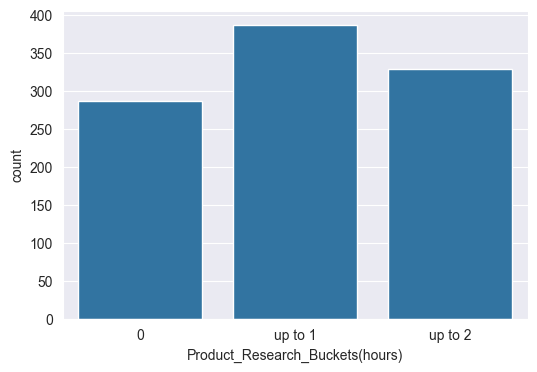

In [28]:
bins = [-0.1, 0, 1, 2]
labels = ['0', 'up to 1', 'up to 2']
data_distribution['Product_Research_Buckets(hours)'] = (pd.cut
                                                        (data_distribution['Time_Spent_on_Product_Research(hours)'], bins=bins, labels=labels))
fig = plt.figure(figsize = (6, 4))
sns.countplot(data=data_distribution, x='Product_Research_Buckets(hours)')
plt.show()

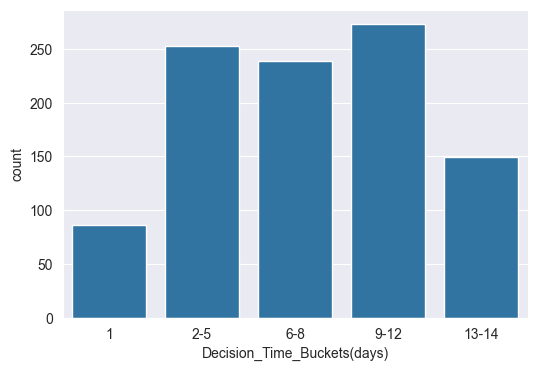

In [29]:
bins = [0, 1, 5, 8, 12, 14]
labels = ['1', '2-5', '6-8', '9-12', '13-14']
data_distribution['Decision_Time_Buckets(days)'] = (pd.cut
                                                    (x=data_distribution['Time_to_Decision'], bins=bins, labels=labels))
fig = plt.figure(figsize = (6, 4))
sns.countplot(data=data_distribution, x='Decision_Time_Buckets(days)')
plt.show()

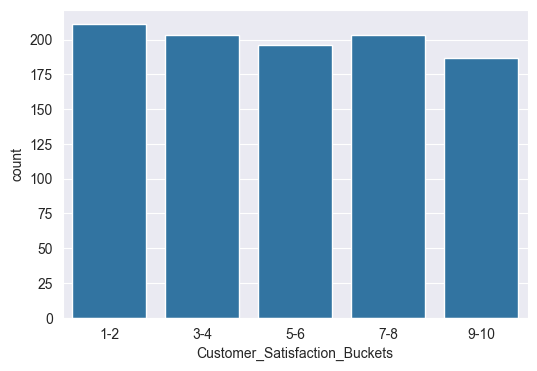

In [30]:
bins = [0, 2, 4, 6, 8, 10]
labels = ['1-2', '3-4', '5-6', '7-8', '9-10']
data_distribution['Customer_Satisfaction_Buckets'] = (pd.cut
                                              (data_distribution['Customer_Satisfaction'], bins=bins, labels=labels))
fig = plt.figure(figsize = (6, 4))
sns.countplot(data=data_distribution, x='Customer_Satisfaction_Buckets')
plt.show()

<div class="alert alert-block alert-info">
<b>Section Summary:</b> The surveyed population is diverse distribution of
most features, regardless of the type of information. some observed patterns
 include...

*Demographics*
1. the higher end of income earners
2. the higher education degrees (considering that only 24% and 14% of US
citizen have bachelor's/master's completed, respectively)

*Purchase Pattern*
1. Buyers purchases on median 6 times a month
2. take their time to decide and research products
3. Both stores and online sales are equally important, so are all the
devices used for shopping
4. Only 19% cash customers, with over 60% paying with card methods.

*Marketing*\
Surveyed customers are in general sensitive to  all marketing schemes
(social media, discount, and advertisement), with more than 2/3
react somewhat positively towards all strategies. Slightly under half of the customer are on the customer loyalty program

*Customer Satisfaction*
1. Product rating, customer satisfaction, and brand loyalty are all spread
out similarly.
2. Over 60% of products gets returned

</div>

## 3.2. Month of Purchase

In [31]:
data_distribution['month_of_purchase'] = (data_distribution['Time_of_Purchase']).dt.month

<Axes: xlabel='month_of_purchase', ylabel='count'>

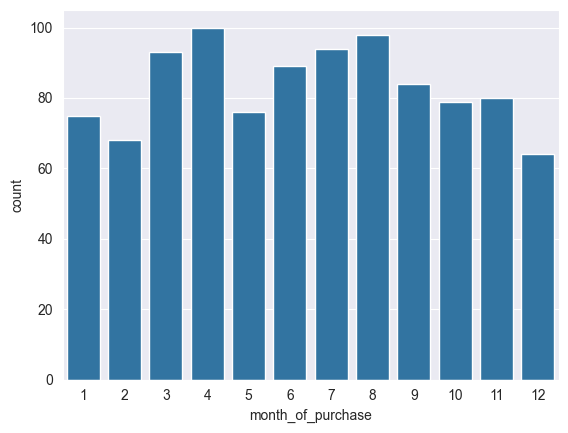

In [32]:
sns.countplot(data=data_distribution, x='month_of_purchase')

# 4. Segmentation

## 4.1. RFM analysis
Objective:<br>
Segment and identify valuable customers based on their
recency,
frequency and monetary values for the business. Based on this analysis,
provide an overview of customer segments and recommendations on actions for
each segment.

In [33]:
data_rfm = data_data_cleaning[['Customer_ID', 'Time_of_Purchase', 'Frequency_of_Purchase',
                 'Purchase_Amount']]

In [34]:
data_rfm.to_csv('data/data_rfm.csv', index=False)

In [35]:
data_data_cleaning.to_csv('data/data_for_rfm.csv', index=False)

Access complete RFM analysis in [Google Sheets](https://docs.google.com/spreadsheets/d/1XJ93vgaaLXZJuY4I7Avh4-zQIvFcPu0qcsWSmEUVSsU/edit?usp=sharing)

Import and merge customer segments

In [36]:
segments = pd.read_csv('data/segments.csv')
data_segments = (data_distribution.merge(segments, on='Customer_ID').drop
                 (columns=['Customer_ID', 'Location', 'Time_of_Purchase',
                           'month_of_purchase', 'SUM of Frequency_of_Purchase',
                           'SUM of Purchase_Amount', 'Customer_Satisfaction_Buckets',
                           'Decision_Time_Buckets(days)', 'Product_Research_Buckets(hours)']))
data_segments.head()

,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,...,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Segment,Days since last purchase
0,22,Female,Middle,Married,Bachelor's,Middle,Gardening & Outdoors,333.80,4,Mixed,...,NaN,Tablet,Credit Card,True,False,Need-based,No Preference,2,At risk,447
1,49,Male,High,Married,High School,High,Food & Beverages,222.22,11,In-Store,...,High,Tablet,PayPal,True,False,Wants-based,Standard,6,Lost,401
2,24,Female,Middle,Single,Master's,High,Office Supplies,426.22,2,Mixed,...,Low,Smartphone,Debit Card,True,True,Impulsive,No Preference,3,At risk,433
3,29,Female,Middle,Single,Master's,Middle,Home Appliances,101.31,6,Mixed,...,NaN,Smartphone,Other,True,True,Need-based,Express,10,Need attention,230
4,33,Female,Middle,Widowed,High School,Middle,Furniture,211.70,6,Mixed,...,NaN,Smartphone,Debit Card,False,False,Wants-based,No Preference,4,Lost,478


After RFM analysis, a total of 8 segments were identified, each
characterizing a unique stereotype.
<br>
1. Top customer: Recent, frequent and spends the most
2. Solid customer: recent, frequent and high value customers
3. Can't lose: high value lapsed customers
4. Regular: recent repeated buyers spending medium amount
5. At risk: medium value lapsed customers
6. New customer: low value very recent customers
7. Need attention : low value infrequent customers
8. Lost: Low value lapsed customers

## 4.2. Segments Overview

Segments proportion

In [37]:
segment_df = data_segments['Segment'].value_counts().reset_index()
segment_df['percentage'] = (segment_df['count'] / segment_df['count'].sum()
                            * 100)
segment_df = segment_df.reindex(index=[7, 2, 5, 6, 4, 0, 3, 1])

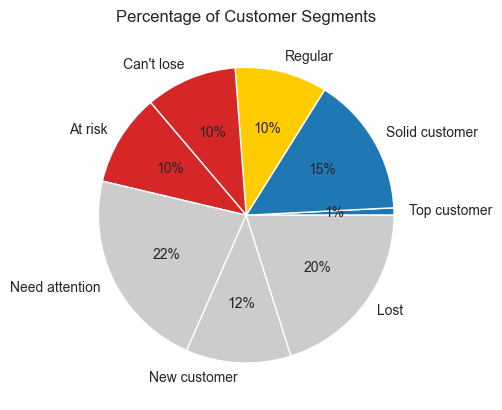

In [38]:
custom_palette = {
    seg: (
        '#1f77b4' if seg in ['Top customer', 'Solid customer'] else
        '#ffcc00' if seg == 'Regular' else
        '#d62728' if seg in ["Can't lose", 'At risk'] else
        '#cccccc'
    )
    for seg in segment_df['Segment']
}
plt.pie(data=segment_df, x='percentage', autopct='%.0f%%',
        labels=segment_df['Segment'], colors=[custom_palette[seg] for seg in segment_df['Segment']])
plt.title('Percentage of Customer Segments')
plt.show()

In [39]:
sum = round(segment_df.loc[:4, 'percentage'].sum(), 1)
print(f'{sum}% of our customers are/were frequent high value spenders')

46.3% of our customers are/were frequent high value spenders


There are 26% Top, Solid, and Regular customer combined, and 20% of customers
who used to be frequent high spenders, with the rest being low value
spenders.

**Core focus**<br>
1. Top + Solid → Retain
2. Regular → Upsell
3. Can't lose + At risk → Recover

These 5 segments cover the 46.3% of customers who are/were frequent high
value customers. Replace other segments with 'other' for easier visualization.

In [40]:
replacements = {'New customer': 'other', 'Need attention': 'other', 'Lost': 'other'}
data_segments['Segment'] = (data_segments['Segment'].map(replacements).fillna
                            (data_segments['Segment']))

## 4.2. Who are our best customers?

Demographic

In [41]:
num_cols = data_segments.select_dtypes(include='number').columns

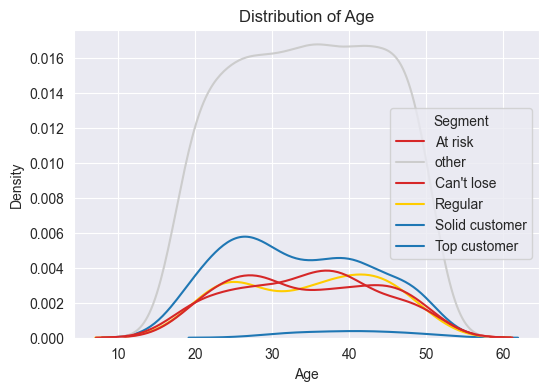

In [42]:
custom_palette = {
    seg: (
        '#1f77b4' if seg in ['Top customer', 'Solid customer'] else
        '#ffcc00' if seg == 'Regular' else
        '#d62728' if seg in ["Can't lose", 'At risk'] else
        '#cccccc'
    )
    for seg in segment_df['Segment']
}

# Fill in any missing segments with default gray
for seg in data_segments['Segment'].unique():
    custom_palette.setdefault(seg, '#cccccc')

plt.figure(figsize = (6, 4))
sns.kdeplot(data=data_segments, x='Age', hue= 'Segment',
            palette=custom_palette)
plt.title('Distribution of Age')
plt.show()

In [43]:
# Select categorical columns, excluding unwanted ones
num_cols = data_segments.select_dtypes(include='number').columns
cat_cols = [col for col in data_segments.columns if col not in num_cols]

# Group by Segment and get the mode for each categorical column
modes = data_segments.groupby('Segment')[cat_cols].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else
None).reindex(index=['Top customer', 'Solid customer', 'Regular', "Can't lose",
                     'At risk', 'other'])
modes[demographic_cat]

,Gender,Income_Level,Marital_Status,Education_Level,Occupation
Segment,,,,,
Top customer,Female,High,Divorced,Bachelor's,High
Solid customer,Male,High,Married,Bachelor's,High
Regular,Male,High,Divorced,Master's,High
Can't lose,Female,High,Widowed,High School,High
At risk,Male,High,Widowed,Bachelor's,High
other,Female,High,Married,Bachelor's,Middle


Purchase Pattern

In [44]:
def barplot_by_segments(data, col, segment, title, palette, ax):
    if ax is None:
        fig, ax = plt.subplots()
    if palette is None:
        palette = sns.color_palette('dark', n_colors=data[segment].nunique())

    order = data.groupby(segment)[col].mean().sort_values(ascending=False).index

    sns.barplot(
        data=data,
        x=col,
        y=segment,
        hue=segment,
        ax=ax,
        order=order,
        palette=palette,
        legend=False,
        errorbar=None
    )

    for container in ax.containers:
        for bar in container:
            length = bar.get_width()
            height = bar.get_y() + bar.get_height() / 2
            ax.text(length + 0.05, height, f'{length:.1f}', va='center')

    ax.set_title(title, pad=15)
    ax.set_xticklabels([])  # hide x-axis labels
    ax.tick_params(axis='x', which='both', bottom=False, top=False)


In [45]:
purchase_pattern_num.append('Days since last purchase')

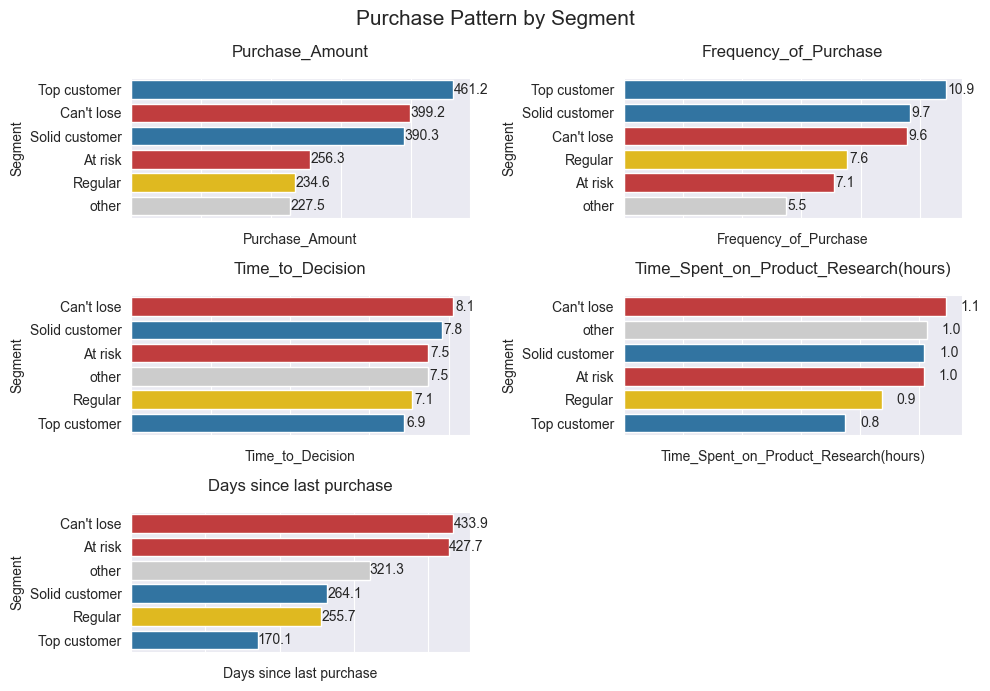

In [46]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 7))
axes_flatten = axes.flatten()
for i, col in enumerate(purchase_pattern_num):
    barplot_by_segments(data=data_segments,
                       col=col, segment='Segment',
                       title=col,
                           palette=custom_palette, ax=axes_flatten[i])

col_len = len(purchase_pattern_num)
ax_len = len(axes_flatten)
if col_len < ax_len:
    for j in range(col_len, ax_len):
        axes_flatten[j].clear()
        axes_flatten[j].axis('off')

plt.suptitle('Purchase Pattern by Segment', fontsize=15)
plt.tight_layout()

In [47]:
modes[purchase_pattern_cat]

,Purchase_Category,Purchase_Channel,Device_Used_for_Shopping,Payment_Method,Purchase_Intent,Shipping_Preference
Segment,,,,,,
Top customer,Packages),In-Store,Desktop,Credit Card,Planned,No Preference
Solid customer,Health Supplements,In-Store,Desktop,PayPal,Impulsive,No Preference
Regular,Electronics,Mixed,Desktop,Cash,Need-based,No Preference
Can't lose,Food & Beverages,Online,Desktop,PayPal,Need-based,No Preference
At risk,Jewelry & Accessories,In-Store,Smartphone,Other,Planned,Standard
other,Home Appliances,Online,Tablet,PayPal,Impulsive,No Preference


Marketing

In [48]:
modes[feature_marketing]

,Social_Media_Influence,Discount_Sensitivity,Discount_Used,Engagement_with_Ads,Customer_Loyalty_Program_Member
Segment,,,,,
Top customer,High,Not Sensitive,False,Low,False
Solid customer,Low,Somewhat Sensitive,True,High,False
Regular,Medium,Very Sensitive,True,High,False
Can't lose,Low,Somewhat Sensitive,True,Medium,False
At risk,Low,Somewhat Sensitive,True,High,False
other,High,Very Sensitive,False,High,True


Customer Satisfaction

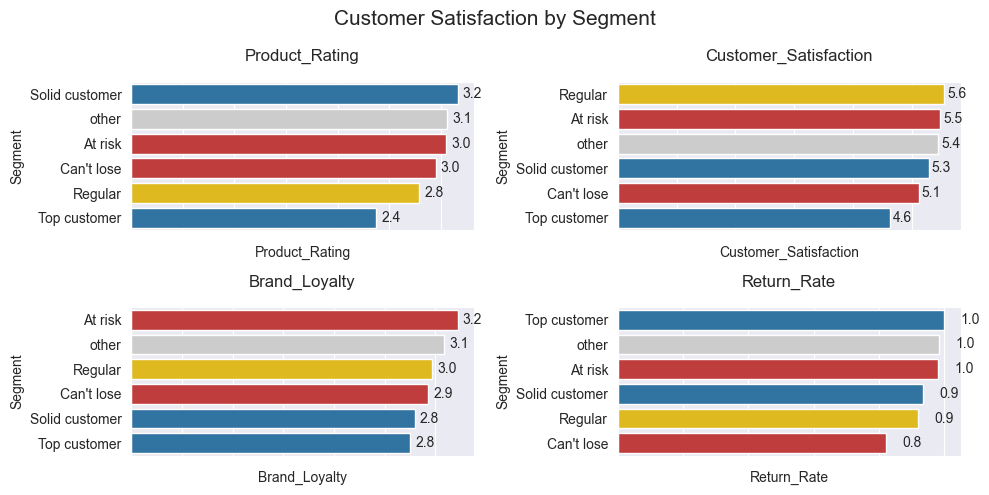

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
axes_flatten = axes.flatten()
for i, col in enumerate(feature_customer_satisfaction):
    barplot_by_segments(data=data_segments,
                        col=col, segment='Segment',
                        title=col,
                        palette=custom_palette, ax=axes_flatten[i])

col_len = len(feature_customer_satisfaction)
ax_len = len(axes_flatten)
if col_len < ax_len:
    for j in range(col_len, ax_len):
        axes_flatten[j].clear()
        axes_flatten[j].axis('off')

plt.suptitle('Customer Satisfaction by Segment', fontsize=15)
plt.tight_layout()

<div class="alert alert-block alert-info">
<b>Segments Summary:</b>

**Demographics**<br>
*Top & Solid Segments*
1. the higher end of income earners, mostly married or divorced
2. most having at least Bachelor's degree completed
3. high occupation<br>

*Regular*
1. divorced high income earners
2. Master's degree completed for most

*At risk, Can't lose*
1. Widowed high income earners
2. slightly less achieved in terms of formal education

**Purchase Pattern**<br>
*Top & Solid Segments*
1. Buyers purchases on overage 10 times a month, and purchase amount between
 $390-460
2. take less time to decide and research products
3. In stores sales are more predominant, and mostly desktop is used for
shopping
4. mostly pay with card<br>

*Regular*
1. Low purchase amount averaging $235
2. purchases 7.8 times per month, medium frequency
3. Spends little time to decide and research products, right under top
customers
4. Recent purchase, averaging 256 days since last purchase
5. Both in store and online, using mostly desktop and cash for shopping

*At risk, Can't lose*<br>
1. Medium frequent buyers with purchase amount of $250-400, who hasn't
bought for over a year
2. Tends to spend more time to decide and research products
3. Both in store/online and desktop/smartphones are used

**Marketing** <br>
*Top & Solid Segments*<br>
 Top customers only react to social media, while solid customers are the
 opposite, being only insensitive to social media. However, both do not
 participate in loyalty program.
 <br>

*Regular*<br>
Insensitive to loyalty member program, medium sensitivity to social media.
Highly sensitive to discounts. <br>

*At risk, Can't lose*<br>
Insensitive to social media and loyalty member program, but sensitive to
discounts and ads.

**Customer Satisfaction**<br>
*Top & Solid Segments*
1. Top customer has the worst product rating and customer satisfaction (2
out 5 and 4.6 out of 10), while solid customers are more generous.
solid segment
2. Lowest brand loyalty (2.8 out of 5) of all segments
3. Top customer returns the most among the 3 segments.<br>

*Regular*<br>
1. Medium product rating (3 out of 5) and the best customer satisfaction of all
 segments (5.6 out of 10)
2. Medium brand loyalty and low product return rate comparing to other
segments.

*At risk, Can't lose*<br>
1. Mid product rating and customer satisfaction
2. Higher brand loyalty and lower return rate comparing to other segments

</div>

## 4.3. How can we reach them better?

<div class="alert alert-block alert-info">
<b>Top & Solid customer: </b>
These customers shop frequently at our store, but scores consistently
low for both product and customer satisfaction, they also tend to return
products more often, and are less sensitive to marketing schemes
overall, reflecting their unsatisfaction.<br>
It is important to retain these high value customers and not lose them due to
low satisfaction.

1. *Improve customer experience* - Create a priority support team to quickly
resolve their problem, and facilitate bureaucracy for product return. <br>

2. *Product customer match* - Recommendation of similar and complementary
products by tracking previously purchased products or products in the shopping
cart. An accurate understanding of what product our customer wants can
reduce return rate.<br>

3. *Personalized marketing* - This segment shows less sensitivity to our
current marketing schemes, meaning they are not optimized. Try personalized
discounts and higher social media exposure for products our customer has
shown interest in.

<b>Regular customer: </b>
High income, low purchase amount and medium frequency. Sensitive to
discounts and brands. In order to boost purchases, upsell with targeted
marketing schemes.
<br>
1. *Discounts* - As this segment is mainly sensitive to discounts,
introduce discounts for future purchases on complementary and adjacent
products (same brand). Also, offer discounts/free services after reaching a
minimum purchase amount.
2. *Product improvement* - Ensure a variety of products from the same brands
previously purchased by this group is available.

<b>At risk, Can't lose customer: </b>
High value lapsed customers, haven't purchased for over a year. Who tends to
 spend more time researching and deciding before purchase. High brand
 loyalty and sensitive to discounts and ads. <br>
 1. *Product improvement* - Ensure favorite brands from this segment is
 available.
2. *Product transparency* - Create ads and generate higher visibility for
products from our website, for example like articles and public
customer feedbacks about our products on our website.
3. *Re-engagement campaign* - Reach out to customers with personalized email
offering attractive discounts/free service to entice them.
4. *Feedback outreach* - Reach out asking about their previous experiences,
understand there was any previous issues to be solved now. Showing
that we value their feedback and are interested in having them back.




</div>

In [50]:
data_segments.to_csv('data_segments.csv', index=False)